In [8]:
# importa o drive para o colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# importa as bibliotecas necessária para o código
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import pylab
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline

In [10]:
uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado.csv'
data = pd.read_csv(uri)	

In [11]:
# divide as colunas em variaveis X e y
X = data.drop("follow_up_classified", axis=1)
y = data["follow_up_classified"]

In [12]:
#divide em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
nayve = GaussianNB()

#fit
nayve.fit(X_train, y_train)

#faz prediçoes
predictions = nayve.predict(X_test)

In [14]:
#Avaliando sem o uso de hiperparâmetro
print('Classification metrics: \n', classification_report(y_test, predictions))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, predictions)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.65      0.56      0.60       281
           1       0.57      0.80      0.66       250
           2       0.93      0.72      0.81       265

    accuracy                           0.69       796
   macro avg       0.72      0.69      0.69       796
weighted avg       0.72      0.69      0.69       796

MSE (Mean-Squared-Error): 0.4861809045226131


In [15]:
#hiperparametros 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nayve, 
                 param_grid=params_NB, 
                 cv=3,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [16]:
#treina o modelo
new_predictions = gs_NB.predict(X_test)

In [17]:
#Avaliando sem o uso de hiperparâmetro
print('Classification metrics: \n', classification_report(y_test,new_predictions))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, predictions)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.78      0.57      0.66       281
           1       0.57      0.84      0.68       250
           2       0.91      0.77      0.83       265

    accuracy                           0.72       796
   macro avg       0.75      0.73      0.72       796
weighted avg       0.76      0.72      0.72       796

MSE (Mean-Squared-Error): 0.4861809045226131


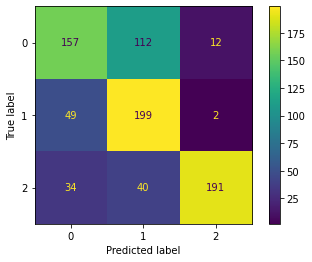

In [18]:
#Exibindo a matriz de confusão dos resultados preditos
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [19]:
#Construindo a base do Pipeline
pipe_rf = Pipeline([('gs_NB', GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing']))])

In [20]:
#Treinando o modelo com Pipeline
model = pipe_rf.fit(X_train, y_train)

In [21]:
#Calculando y_score
y_score = model.predict_proba(X_test)

In [22]:
#Declarando valores unicos de classes em ordem
n_binaries = y_test.unique()
n_binaries.sort()

#Binarizando a saída
y_test_bin = label_binarize(y_test, classes=n_binaries)
n_classes = y_test_bin.shape[1]


AUC for Class 1: 0.8667726220502368
AUC for Class 2: 0.8427619047619048
AUC for Class 3: 0.9104288810716696


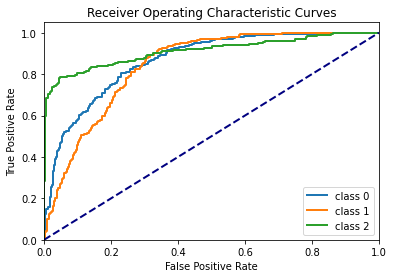

In [23]:
#Calculando e exibindo curva ROC das classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--' )
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()